CartPole_V-REP_GettingStarted-court.ipynb

    v1.0  2018.05.08  JLC  Version initiale
    v1.1  Utilisation de Vrepper pour lancer automatique le process V-REP

# API Python V-REP

**Versions VREP** : 
- V-REP_PRO_EDU_V3_5_0 plante sous Linux quand utilise l'option `-h` pour le mode headless (pas de rendu graphique 3D pour accélérer le temps de simu).
- V-REP_PRO_EDU_V3_4_0 fonctionne bien sous Linux avec le `-h`.

Dans le même dossier que le cahier IPython, on doit avoir les fichiers:

(à prendre dans .../V-REP/V-REP_PRO_EDU_V3_4_0_.../programming/remoteApiBindings/python/python)
- vrep.py
- vrepConst.py 

(à prendre dans .../V-REP_PRO_EDU_V3_4_0_.../programming/remoteApiBindings/lib/lib...)
- the appropriate remote API library: "remoteApi.dll" (Windows), "remoteApi.dylib" (Mac) or "remoteApi.so" (Linux)

Dans le fichier `remoteApiConnections.txt` du dossier d'installation de V-REP, vérifier les dernières lignes :

    // Let's start a continuous remote API server service on port 19997:
    portIndex1_port             = 19997
    portIndex1_debug            = false
    portIndex1_syncSimTrigger   = true
    
La doc syntaxe APY Python est ici : http://www.coppeliarobotics.com/helpFiles/en/remoteApiFunctionsPython.htm

In [1]:
try:
    import vrep
except:
    print ('--------------------------------------------------------------')
    print ('"vrep.py" could not be imported. This means very probably that')
    print ('either "vrep.py" or the remoteApi library could not be found.')
    print ('Make sure both are in the same folder as this file,')
    print ('or appropriately adjust the file "vrep.py"')
    print ('--------------------------------------------------------------')
    print ('')

import sys, time
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from vrepper import Vrepper

In [2]:
error_mess = 'Remote API error code: '
OK = vrep.simx_return_ok

opmode_blocking    = vrep.simx_opmode_blocking
opmode_oneshot     = vrep.simx_opmode_oneshot
opmode_buffer      = vrep.simx_opmode_buffer
opmode_streaming   = vrep.simx_opmode_streaming
opmode_discontinue =  vrep.simx_opmode_discontinue

In [3]:
dir_vrep = '/home/jlc/work/ENSAM/Robotique/V-REP/V-REP_PRO_EDU_V3_4_0_Linux'

vrepper = Vrepper(19997, dir_vrep, headless=False, verbose=2)
vrepper.start()
#vrepper.load_scene(scene)

[V-repper] port_num is: 19997
[V-repper] path to vrep is: /home/jlc/work/ENSAM/Robotique/V-REP/V-REP_PRO_EDU_V3_4_0_Linux
[V-repper] vrep args: ['/home/jlc/work/ENSAM/Robotique/V-REP/V-REP_PRO_EDU_V3_4_0_Linux/vrep.sh', '-gREMOTEAPISERVERSERVICE_19997_FALSE_TRUE']
[V-repper] starting an instance of V-REP...
[Instance] trying to start </home/jlc/work/ENSAM/Robotique/V-REP/V-REP_PRO_EDU_V3_4_0_Linux/vrep.sh -gREMOTEAPISERVERSERVICE_19997_FALSE_TRUE>
[Instance] started : <subprocess.Popen object at 0x7fd6bc3554e0>
[V-repper] trying to connect to server on port 19997, retry:0
[V-repper] trying to connect to server on port 19997, retry:1
[V-repper] trying to connect to server on port 19997, retry:2
[V-repper] trying to connect to server on port 19997, retry:3
[V-repper] Connected to remote API server with cid:0
[V-repper] V-REP instance started, remote API connection OK.


In [4]:
print ('Program started')
vrep.simxFinish(-1) # just in case, close all opened connections

clientID = vrep.simxStart('127.0.0.1',19997,True,True,5000,5) # Connect to V-REP

if clientID == -1:
    print ('NOT Connected to remote API server')
    sys.exit("Could not connect")
else:
    print ('Successfully connected to the remote V-REP server with clinetID={}'.format(clientID))

Program started
Successfully connected to the remote V-REP server with clinetID=0


## simxLoadScene

In [6]:
scene =  "../CartPole-v1.3-84g355g_M30_L50.ttt"
err_code = vrep.simxLoadScene(clientID, scene, 0xFF, opmode_blocking)
if err_code == OK:
    print ('Scene <{}> successfully loaded !'.format(scene))
else:
    print (error_mess, err_code)

Scene <../CartPole-v1.3-84g355g_M30_L50.ttt> successfully loaded !


### Obtenir les handles pour "Slider", "Cart", "Joint" et "Pole" 

In [7]:
err_code, slider_handle = vrep.simxGetObjectHandle(clientID, "Slider", opmode_blocking)
if err_code != OK: print (error_mess, err_code)
    
err_code, cart_handle = vrep.simxGetObjectHandle(clientID, "Cart", opmode_blocking)
if err_code != OK: print (error_mess, err_code)
    
err_code, joint_handle = vrep.simxGetObjectHandle(clientID, "Joint", opmode_blocking)
if err_code != OK: print (error_mess, err_code)
    
err_code, pole_handle = vrep.simxGetObjectHandle(clientID, "Pole", opmode_blocking)
if err_code != OK: print (error_mess, err_code)

print ('Handle on "Slider": ', slider_handle)
print ('Handle on "Cart": ', cart_handle)
print ('Handle on "Joint": ', joint_handle)
print ('Handle on "Pole": ', pole_handle)

Handle on "Slider":  18
Handle on "Cart":  13
Handle on "Joint":  14
Handle on "Pole":  15


## Vérifier la liaison glissière "Slider"

In [8]:
err_code, val = vrep.simxGetJointPosition(clientID, slider_handle, opmode_blocking)
if err_code == OK:
    print("Slider initial position:", val)
else:
    print (error_mess, err_code)

Slider initial position: 0.0


In [9]:
err_code = vrep.simxSetJointPosition(clientID, slider_handle, 0.1, opmode_oneshot)

In [10]:
err_code = vrep.simxSetJointPosition(clientID, slider_handle, -0.1, opmode_oneshot)

In [11]:
err_code, val = vrep.simxGetObjectPosition(clientID, cart_handle, -1, opmode_blocking)
val

[0.0, -0.10000001639127731, 0.020024847239255905]

In [12]:
err_code, linVelocity, angVelocity = vrep.simxGetObjectVelocity(clientID, slider_handle, opmode_oneshot)
print("linearVelocity",linVelocity)
print("angularVelocity",angVelocity)

linearVelocity [0.0, 0.0, 0.0]
angularVelocity [0.0, 0.0, 0.0]


Exploration complète de la course du 'Slider' de  + ou - 30 cm 
(*sans simulation physique => uniquement déplacement géométrique pour vérifier la cinématique*)

In [13]:
err_code = vrep.simxSetJointPosition(clientID, slider_handle, 0, opmode_oneshot)
for d in np.arange(-0.30,0.31,0.01):
    err_code = vrep.simxSetJointPosition(clientID, slider_handle, d, opmode_oneshot)
    if err_code != OK: print (error_mess, err_code)
    print("{:6.1f} mm\r".format(d*1000), end="")
    time.sleep(0.1)
err_code = vrep.simxSetJointPosition(clientID, slider_handle, 0, opmode_oneshot)

  ## Vérifier la liaison pivot "Joint"

In [14]:
err_code, val = vrep.simxGetJointPosition(clientID, joint_handle, opmode_blocking)
if err_code == OK:
    print("Joint angle: {:.1f}°".format(np.degrees(val)))
else:
    print (error_mess, err_code)

Joint angle: 0.0°


In [15]:
err_code = vrep.simxSetJointPosition(clientID, joint_handle, np.radians(45), opmode_oneshot)

In [16]:
err_code = vrep.simxSetJointPosition(clientID, joint_handle, np.radians(-45), opmode_oneshot)

Exploration complète de la course de la liaison pivot "Joint" de  + ou - 180 ° 
(*sans simulation physique => uniquement déplacement géométrique pour vérifier la cinématique*)

In [17]:
err_code = vrep.simxSetJointPosition(clientID, joint_handle, 0, opmode_oneshot)
t0 = time.time()
for d in np.arange(0, 2.01*pi, pi/100):
    err_code = vrep.simxSetJointPosition(clientID, joint_handle, d, opmode_oneshot)
    print("{:4.1f}°\r".format(np.degrees(d)), end="")
    time.sleep(0.05)
t1 = time.time()
err_code = vrep.simxSetJointPosition(clientID, joint_handle, 0, opmode_oneshot)
print("\n2*pi en {:.2f} secondes -> vitesse angulaire {:.3f} rd/s ou {:.3f} °/s"\
      .format(t1-t0,2*pi/(t1-t0),360/(t1-t0)))

360.0°
2*pi en 10.20 secondes -> vitesse angulaire 0.616 rd/s ou 35.287 °/s


## Remettre "CartPole" dans sa position initiale :

In [50]:
def reset(s=0, j=0):
    err_code = vrep.simxSetJointPosition(clientID, slider_handle, s, opmode_oneshot)
    err_code = vrep.simxSetJointPosition(clientID, joint_handle, np.radians(j), opmode_oneshot)

In [51]:
reset(0.1, -45)  # meter, degree

In [52]:
reset()

## 1/ Simulations "free run" : 

Slider en mode `Torque/force mode` et  `motor_enabled` + `Control loop enabled` + `Spring-damper mode`

<img src="Images/Slider-properties.png" style="height: 480px; width: 650px" align="middle" />

## Simulation de 3 secondes avec lecture synchrone de l'état du Cartpole 

L'état du Cartpole est défini par le quadruplet $[x, x',\theta, \theta']$

Le mode **synchronous** permet de piloter la simulation V-Rep de façon synchrone depuis le programme Python.<br/>
À chaque appel `simxSynchronousTrigger` la simulation V-Rep fait un pas, et l'on peut récupérer en streaming l'état du cartpole.<br />

La simulation V-Rep doit être réglée avec un pas de 25 ms.

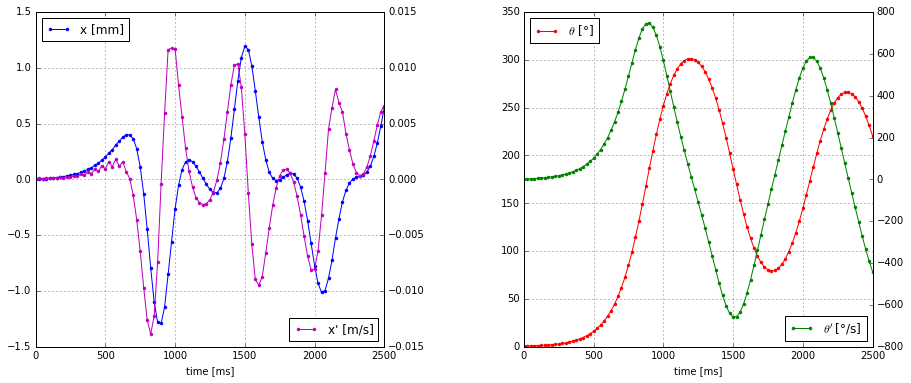

In [54]:
# Request for synchronous operation:
vrep.simxSynchronous(clientID,True)

vrep.simxGetJointPosition(clientID, slider_handle, opmode_streaming)
vrep.simxGetObjectVelocity(clientID, cart_handle, opmode_streaming)
vrep.simxGetJointPosition(clientID, joint_handle, opmode_streaming)
vrep.simxGetObjectVelocity(clientID, pole_handle, opmode_streaming)

err_code = vrep.simxStartSimulation(clientID,opmode_oneshot);

reset(0, 1)
M, timeSimu = [], 0
while True:
    err_code = vrep.simxSynchronousTrigger(clientID)
    
    if err_code == OK :
        timeSimu = vrep.simxGetLastCmdTime(clientID)
        data = [timeSimu]
    else: 
        data =[0]
    print("{:4.1f} ms\r".format(timeSimu), end="")

    err_code, x = vrep.simxGetJointPosition(clientID, slider_handle, opmode_buffer)
    if err_code != OK:
        # once you have enabled data streaming, it will take a few ms until the first value has arrived. So if
        #we landed in this code section, this does not always mean we have an error!!!
        pass
    data.append(x*1000)

    err_code, cart_linV, pouet = vrep.simxGetObjectVelocity(clientID, cart_handle, opmode_buffer)
    if err_code != OK: pass
    data.append(cart_linV[1])
    
    err_code, theta = vrep.simxGetJointPosition(clientID, joint_handle, opmode_buffer)
    if err_code != OK: pass
    data.append(theta)
    
    err_code, pole_linV, pole_angV = vrep.simxGetObjectVelocity(clientID, pole_handle, opmode_buffer)
    if err_code != OK: pass
    data.append(pole_angV[0])
    
    M.append(data)
    
    if timeSimu >= 2500: break

vrep.simxGetJointPosition(clientID, slider_handle, opmode_discontinue)
vrep.simxGetObjectVelocity(clientID, cart_handle, opmode_discontinue)
vrep.simxGetJointPosition(clientID, joint_handle, opmode_discontinue)
vrep.simxGetObjectVelocity(clientID, joint_handle, opmode_discontinue)
        
vrep.simxStopSimulation(clientID, opmode_oneshot)

vrep.simxSynchronous(clientID,False)

M = np.array(M)
np.set_printoptions(suppress=True)
#print("time [ms]       y[mm]     Vy [m/s]  theta [°]   theta' [°/s]")
#print(M)

plt.figure(figsize=(15,6))
plt.subplots_adjust(wspace=0.4)
plt.subplot(121)
plt.plot(M[:,0],M[:,1],'.-b', label='x [mm]')
plt.xlabel('time [ms]')
plt.legend(loc='upper left')
plt.grid()
plt.twinx()
plt.plot(M[:,0],M[:,2],'.-m', label="x' [m/s]")
plt.legend(loc='lower right')
         
plt.subplot(122)
plt.plot(M[:,0],np.degrees(M[:,3]),'.-r',label=r'$\theta$'+' [°]')
#plt.ylim(0, 360)
plt.xlabel('time [ms]')
plt.legend(loc='upper left')
plt.grid()
plt.twinx()
#plt.ylim(0,360)
plt.plot(M[:,0],np.degrees(M[:,4]),'.-g',label=r"$\theta'$"+ ' [°/s]')
plt.legend(loc='lower right');

## 1/ Simulations "Physique du CartPole piloté" : 

Slider en `motor_enabled` mais  `Control loop enabled` **désactivé**

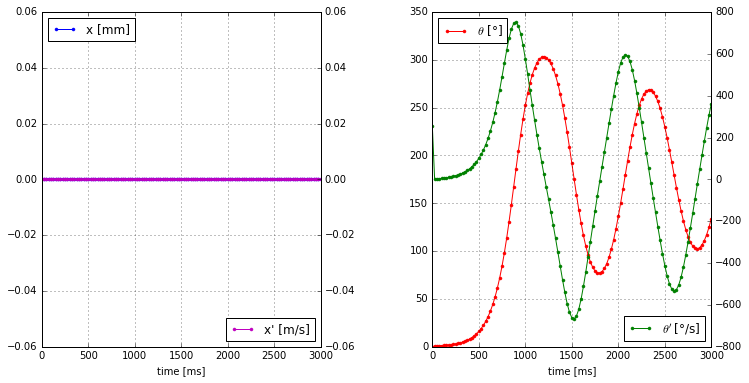

In [56]:
# Request for synchronous operation:
vrep.simxSynchronous(clientID,True)

vrep.simxGetJointPosition(clientID, slider_handle, opmode_streaming)
vrep.simxGetObjectVelocity(clientID, cart_handle, opmode_streaming)
vrep.simxGetJointPosition(clientID, joint_handle, opmode_streaming)
vrep.simxGetObjectVelocity(clientID, pole_handle, opmode_streaming)

err_code = vrep.simxStartSimulation(clientID,opmode_oneshot);

reset(0, 1)
M, timeSimu = [], 0
while True:
    err_code = vrep.simxSynchronousTrigger(clientID)
    
    if err_code == OK :
        timeSimu = vrep.simxGetLastCmdTime(clientID)
        data = [timeSimu]
    else: 
        data =[0]
    print("{:4.1f} ms\r".format(timeSimu), end="")

    err_code, x = vrep.simxGetJointPosition(clientID, slider_handle, opmode_buffer)
    if err_code != OK: pass
    data.append(x*1000)

    err_code, cart_linV, pouet = vrep.simxGetObjectVelocity(clientID, cart_handle, opmode_buffer)
    if err_code != OK: pass
    data.append(cart_linV[1])
    
    err_code, theta = vrep.simxGetJointPosition(clientID, joint_handle, opmode_buffer)
    if err_code != OK: pass
    data.append(theta)
    
    err_code, pouet, pole_angV = vrep.simxGetObjectVelocity(clientID, pole_handle, opmode_buffer)
    if err_code != OK: pass
    data.append(pole_angV[0])
    
    M.append(data)
    
    if timeSimu >= 3000: break

vrep.simxGetJointPosition(clientID, slider_handle, opmode_discontinue)
vrep.simxGetObjectVelocity(clientID, cart_handle, opmode_discontinue)
vrep.simxGetJointPosition(clientID, joint_handle, opmode_discontinue)
vrep.simxGetObjectVelocity(clientID, joint_handle, opmode_discontinue)
        
vrep.simxStopSimulation(clientID, opmode_oneshot)

vrep.simxSynchronous(clientID,False)

M = np.array(M)
np.set_printoptions(suppress=True)
#print("time [ms]       y[mm]     Vy [m/s]  theta [°]   theta' [°/s]")
#print(M)

plt.figure(figsize=(12,6))
plt.subplots_adjust(wspace=0.4)
plt.subplot(121)
plt.plot(M[:,0],M[:,1],'.-b', label='x [mm]')
plt.xlabel('time [ms]')
plt.legend(loc='upper left')
plt.grid()
plt.twinx()
plt.plot(M[:,0],M[:,2],'.-m', label="x' [m/s]")
plt.legend(loc='lower right')
         
plt.subplot(122)
plt.plot(M[:,0],np.degrees(M[:,3]),'.-r',label=r'$\theta$'+' [°]')
#plt.ylim(0,360)
plt.xlabel('time [ms]')
plt.legend(loc='upper left')
plt.grid()
plt.twinx()
#plt.ylim(0,360)
plt.plot(M[:,0],np.degrees(M[:,4]),'.-g',label=r"$\theta'$"+ ' [°/s]')
plt.legend(loc='lower right');

## simxCloseScene

In [57]:
err_code = vrep.simxCloseScene(clientID, opmode_blocking)

## Close V-REP

In [58]:
vrepper.end()

[Instance] terminating...
[Instance] waiting ...
[Instance] retcode:-15
[V-repper] everything shut down.
